# Dataset creation

The required dataset is created from [RSNA Journal](https://pubs.rsna.org)  scraping with beautifulsoup4




In [ ]:
!pip install requests
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup
import time
BASE_URL = "https://pubs.rsna.org"
URL = "https://pubs.rsna.org/journal/radiology"
r = requests.get(URL)


soup = BeautifulSoup(r.content, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib
# print(soup.prettify())
all_spans = soup.find_all("span")

span_parent = None
for span in all_spans:

    if span.text == 'Browse by':
        span_parent = span.parent.parent
        print('span_parent',span_parent)


links = span_parent.find_all("a")
print('links',links)
links_to_scrape = []
for link in links[1:]:
    page = requests.get(BASE_URL + link['href'])
    page_soup = BeautifulSoup(page.content, 'html5lib')
    journal_count = page_soup.find('span', class_='result__count')

    if int(journal_count.text) > 100:
        item = {'topic':link.text, 'url':BASE_URL + link['href']}
        links_to_scrape.append(item)
    time.sleep(2)





span_parent <li class="menu-parent"><a href="#"><span>Browse by</span></a>
        <ul>
            <li><a href="/topic/subspecialty/bq?SeriesKey=radiology&amp;sortBy=Ppub">Biomarkers/Quantitative Imaging</a></li>
            <li><a href="/topic/subspecialty/br?SeriesKey=radiology&amp;sortBy=Ppub">Breast Imaging</a></li>
            <li><a href="/topic/subspecialty/ca?SeriesKey=radiology&amp;sortBy=Ppub">Cardiac Radiology</a></li>
            <li><a href="/topic/subspecialty/ch?SeriesKey=radiology&amp;sortBy=Ppub">Chest Radiology</a></li>
            <li><a href="/topic/subspecialty/ct?SeriesKey=radiology&amp;sortBy=Ppub">Computed Tomography</a></li>
            <li><a href="/topic/subspecialty/ed?SeriesKey=radiology&amp;sortBy=Ppub">Education</a></li>
            <li><a href="/topic/subspecialty/er?SeriesKey=radiology&amp;sortBy=Ppub">Emergency Radiology</a></li>
            <li><a href="/topic/subspecialty/gi?SeriesKey=radiology&amp;sortBy=Ppub">Gastrointestinal Radiology</a></li>
  

In [ ]:
# links_to_scrape = links_to_scrape[1:]
print(links_to_scrape)

[{'topic': 'Breast Imaging', 'url': 'https://pubs.rsna.org/topic/subspecialty/br?SeriesKey=radiology&sortBy=Ppub'}, {'topic': 'Cardiac Radiology', 'url': 'https://pubs.rsna.org/topic/subspecialty/ca?SeriesKey=radiology&sortBy=Ppub'}, {'topic': 'Chest Radiology', 'url': 'https://pubs.rsna.org/topic/subspecialty/ch?SeriesKey=radiology&sortBy=Ppub'}, {'topic': 'Computed Tomography', 'url': 'https://pubs.rsna.org/topic/subspecialty/ct?SeriesKey=radiology&sortBy=Ppub'}, {'topic': 'Gastrointestinal Radiology', 'url': 'https://pubs.rsna.org/topic/subspecialty/gi?SeriesKey=radiology&sortBy=Ppub'}, {'topic': 'Genitourinary Radiology', 'url': 'https://pubs.rsna.org/topic/subspecialty/gu?SeriesKey=radiology&sortBy=Ppub'}, {'topic': 'Head and Neck', 'url': 'https://pubs.rsna.org/topic/subspecialty/hn?SeriesKey=radiology&sortBy=Ppub'}, {'topic': 'Health Policy', 'url': 'https://pubs.rsna.org/topic/subspecialty/hp?SeriesKey=radiology&sortBy=Ppub'}, {'topic': 'Informatics', 'url': 'https://pubs.rsna.

In [ ]:
for link in links_to_scrape:
  link['count']=0

print(links_to_scrape)

[{'topic': 'Breast Imaging', 'url': 'https://pubs.rsna.org/topic/subspecialty/br?SeriesKey=radiology&sortBy=Ppub', 'count': 0}, {'topic': 'Cardiac Radiology', 'url': 'https://pubs.rsna.org/topic/subspecialty/ca?SeriesKey=radiology&sortBy=Ppub', 'count': 0}, {'topic': 'Chest Radiology', 'url': 'https://pubs.rsna.org/topic/subspecialty/ch?SeriesKey=radiology&sortBy=Ppub', 'count': 0}, {'topic': 'Computed Tomography', 'url': 'https://pubs.rsna.org/topic/subspecialty/ct?SeriesKey=radiology&sortBy=Ppub', 'count': 0}, {'topic': 'Gastrointestinal Radiology', 'url': 'https://pubs.rsna.org/topic/subspecialty/gi?SeriesKey=radiology&sortBy=Ppub', 'count': 0}, {'topic': 'Genitourinary Radiology', 'url': 'https://pubs.rsna.org/topic/subspecialty/gu?SeriesKey=radiology&sortBy=Ppub', 'count': 0}, {'topic': 'Head and Neck', 'url': 'https://pubs.rsna.org/topic/subspecialty/hn?SeriesKey=radiology&sortBy=Ppub', 'count': 0}, {'topic': 'Health Policy', 'url': 'https://pubs.rsna.org/topic/subspecialty/hp?Se

In [ ]:
scrape_links = [w['url'].replace('Ppub', 'Earliest') for w in links_to_scrape]
scrape_links

['https://pubs.rsna.org/topic/subspecialty/br?SeriesKey=radiology&sortBy=Earliest',
 'https://pubs.rsna.org/topic/subspecialty/ca?SeriesKey=radiology&sortBy=Earliest',
 'https://pubs.rsna.org/topic/subspecialty/ch?SeriesKey=radiology&sortBy=Earliest',
 'https://pubs.rsna.org/topic/subspecialty/ct?SeriesKey=radiology&sortBy=Earliest',
 'https://pubs.rsna.org/topic/subspecialty/gi?SeriesKey=radiology&sortBy=Earliest',
 'https://pubs.rsna.org/topic/subspecialty/gu?SeriesKey=radiology&sortBy=Earliest',
 'https://pubs.rsna.org/topic/subspecialty/hn?SeriesKey=radiology&sortBy=Earliest',
 'https://pubs.rsna.org/topic/subspecialty/hp?SeriesKey=radiology&sortBy=Earliest',
 'https://pubs.rsna.org/topic/subspecialty/in?SeriesKey=radiology&sortBy=Earliest',
 'https://pubs.rsna.org/topic/subspecialty/ir?SeriesKey=radiology&sortBy=Earliest',
 'https://pubs.rsna.org/topic/subspecialty/mr?SeriesKey=radiology&sortBy=Earliest',
 'https://pubs.rsna.org/topic/subspecialty/mi?SeriesKey=radiology&sortBy=Ear

In [ ]:
import random
import math
article_links = []

# with open('rsna_dataset.csv','w') as fw:
#           fw.write('topic;title;authors;abstract')
for link in links_to_scrape:
  print('scraping link ' + str(link['url']))
  page = requests.get(link['url'])
  page_soup = BeautifulSoup(page.content, 'html5lib')
  journal_count = int(page_soup.find('span', class_='result__count').text)
  page_count = journal_count//20
  perpage = math.ceil(200/page_count) if math.ceil(200/page_count) < 20 else 20
  

  for index in range(page_count):
    if link['count'] >= 100:
      break;
    print('page ' + str(index))
    print('per page ' + str(perpage))
    articles = random.sample(range(20), perpage)
    paginated_link = link['url'] + '&startPage={0}&pageSize=20'.format(index)
    paginated_page = requests.get(paginated_link)
    paginated_soup = BeautifulSoup(paginated_page.content, 'html5lib')
    article_list = paginated_soup.find_all('li', class_='clearfix separator search__item')
    for i in articles:
      try:
        print('scraping ' + link['topic'] +' count ' + str(link['count']))
        title = article_list[i].find('h4', class_="meta__title meta__title__margin").text
        authors_list = article_list[i].find_all('span', class_="hlFld-ContribAuthor")
        authors_names = " ".join([author.find('a').text for author in authors_list])
        abstract_link = BASE_URL + article_list[i].find('a', title = 'Abstract')['href']
        
        abstract_page = requests.get(abstract_link)
        abstract_soup = BeautifulSoup(abstract_page.content, 'html5lib')
        abstract_heading = abstract_soup.find('div', class_='sectionInfo abstractSectionHeading')
        if abstract_heading:
          abstract = abstract_soup.find('div','hlFld-Abstract').select('p')[0].get_text().replace(';',' ')
          with open('rsna_dataset.csv','a') as fw:
            fw.write('\n'+str(link['topic'])+';'+str(title)+';'+str(authors_names)+';'+str(abstract))
            link['count'] += 1
        time.sleep(4)
      except Exception as e:
        print('error ' + str(e))
        continue
    time.sleep(4)

 



scraping link https://pubs.rsna.org/topic/subspecialty/br?SeriesKey=radiology&sortBy=Ppub
page 0
per page 8
scraping Breast Imaging count 0
scraping Breast Imaging count 0
scraping Breast Imaging count 0
scraping Breast Imaging count 0
scraping Breast Imaging count 0
scraping Breast Imaging count 0
scraping Breast Imaging count 1
scraping Breast Imaging count 2
page 1
per page 8
scraping Breast Imaging count 2
scraping Breast Imaging count 3
scraping Breast Imaging count 4
scraping Breast Imaging count 5
scraping Breast Imaging count 6
scraping Breast Imaging count 7
scraping Breast Imaging count 8
scraping Breast Imaging count 9
page 2
per page 8
scraping Breast Imaging count 10
scraping Breast Imaging count 11
scraping Breast Imaging count 12
scraping Breast Imaging count 13
scraping Breast Imaging count 14
scraping Breast Imaging count 15
scraping Breast Imaging count 16
scraping Breast Imaging count 17
page 3
per page 8
scraping Breast Imaging count 18
scraping Breast Imaging count

AttributeError: ignored

# Data Cleaning and pre-processing

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('rsna_dataset2.csv.xls', delimiter=";")
data['title_abstract'] = data[['title','abstract']].agg(' '.join, axis=1)

In [ ]:
data.head(5)

,topic,title,authors,abstract,title_abstract
0,Breast Imaging,A Pilot Study to Assess the Performance of Pha...,Laurie L. Fajardo Stephen L. Hillis Bin Zheng ...,In this pilot study for an inline phase-sensit...,A Pilot Study to Assess the Performance of Pha...
1,Breast Imaging,The Digital Divide in Radiology: Computer Use ...,Peter Abraham Patricia Balthazar Nicholas Jame...,Reliance on digital patient portals and online...,The Digital Divide in Radiology: Computer Use ...
2,Breast Imaging,Association of Longitudinal Mammographic Breas...,Thi Xuan Mai Tran Soyeoun Kim Huiyeon Song Eun...,In premenopausal and postmenopausal women unde...,Association of Longitudinal Mammographic Breas...
3,Breast Imaging,Background Parenchymal Enhancement at Postoper...,Su Hyun Lee Myoung-jin Jang Heera Yoen Youkyou...,Background parenchymal enhancement assessed at...,Background Parenchymal Enhancement at Postoper...
4,Breast Imaging,Prospective Evaluation of Ultrafast Breast MRI...,Toulsie Ramtohul Clara Tescher Pauline Vaflard...,The wash-in slope derived from initial ultrafa...,Prospective Evaluation of Ultrafast Breast MRI...


In [ ]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]


def clean_text_1(x): # this combines hyphenated words into single word, but in this context thats a better approach
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '')
    return x

def clean_text(x):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', x)
    return x

In [ ]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub("^\d+\s|\s\d+\s|\s\d+$", "", x)
    return x

In [ ]:
def convert_lowercase(x):
    return x.lower()

In [ ]:
from gensim.utils import tokenize

def tokenize_input(x):
  return np.array(list(tokenize(x)))


In [ ]:
from numpy import linalg as LA
import gensim.downloader

word2vec = gensim.downloader.load('word2vec-google-news-300')

def get_word_vector(x):
  try:
    return word2vec[x]
  except:
    return np.zeros(300)



def calculate_average_norm_vector(x):
  word_vector = np.zeros(300)
  size = len(x)
  embedding_list = []
  for word in x:
    embedding_list.append(get_word_vector(word))
    
  embed_arr = np.array(embedding_list)
  return np.mean(embed_arr, axis=0)


In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

def remove_stop_words(x):
    x = remove_stopwords(x)
    return x

In [ ]:
data['topic_cleaned'] = data['topic'].apply(clean_text_1).apply(clean_numbers).apply(convert_lowercase)

In [ ]:
data['abstract_cleaned'] = data['abstract'].apply(clean_text_1).apply(clean_numbers).apply(convert_lowercase).apply(remove_stop_words)

In [ ]:
data['title_cleaned'] = data['title'].apply(clean_text_1).apply(clean_numbers).apply(convert_lowercase).apply(remove_stop_words)

In [ ]:
data['title_cleaned'] = data['title'].apply(clean_text_1).apply(clean_numbers).apply(convert_lowercase).apply(remove_stop_words)

In [ ]:
data['title_abstract_cleaned'] = data['title_abstract'].apply(clean_text_1).apply(clean_numbers).apply(convert_lowercase).apply(remove_stop_words)

In [ ]:
topics = data['topic'].unique()
print(topics)

['Breast Imaging' 'Cardiac Radiology' 'Chest Radiology'
 'Computed Tomography' 'Gastrointestinal Radiology'
 'Genitourinary Radiology' 'Head and Neck' 'Health Policy' 'Informatics'
 'Interventional Radiology' 'Magnetic Resonance Imaging'
 'Molecular Imaging' 'Musculoskeletal Radiology' 'Neuroradiology'
 'Oncologic Imaging']


# 2) Edit distance (Levenshtein) calculation

In [ ]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 7.2 MB/s 
     |████████████████████████████████| 2.2 MB 39.7 MB/s 


In [ ]:
from fuzzywuzzy import fuzz
from Levenshtein import distance

distance_array = []
distance_array_top_abstract = []
topic_index = {}

uniqe_topics = data['topic'].unique()

for index, row in data.iterrows():
  distance_array.append(distance(row['topic_cleaned'],row['title_cleaned']))
  distance_array_top_abstract.append(distance(row['topic_cleaned'],row['abstract_cleaned']))
  if row['topic'] in uniqe_topics:
#     print(row['topic'])
    if not row['topic'] in topic_index:
        topic_index[row['topic']] = {'x':[]}
    topic_index[row['topic']]['x'].append(distance(row['topic_cleaned'],row['title_cleaned']))
    topic_index[row['topic']]['y'] = np.where(uniqe_topics==row['topic'])[0]
    
    
print(topic_index)

{'Breast Imaging': {'x': [57, 67, 79, 105, 84, 61, 56, 108, 160, 36, 105, 53, 85, 111, 116, 87, 80, 75, 51, 37, 105, 100, 73, 92, 72, 94, 83, 31, 78, 102, 123, 76, 103, 83, 119, 80, 86, 72, 46, 134, 115, 132, 80, 107, 114, 129, 133, 156, 102, 45, 61, 103, 69, 65, 156, 96, 112, 98, 55, 158, 70, 125, 133, 60, 62, 63, 90, 33, 88, 86, 58, 101, 87, 121, 54, 79, 96, 101, 94, 75, 129, 45, 68, 97, 77, 117, 182, 109, 145, 65, 80, 111, 101, 26, 79, 85, 52, 102, 98, 55, 126], 'y': array([0])}, 'Cardiac Radiology': {'x': [85, 72, 124, 84, 98, 122, 72, 90, 151, 83, 105, 91, 99, 138, 106, 113, 97, 100, 124, 73, 91, 78, 78, 109, 114, 113, 90, 48, 92, 48, 90, 96, 53, 20, 95, 85, 86, 147, 78, 124, 54, 169, 112, 55, 91, 55, 100, 54, 98, 64, 92, 87, 138, 94, 113, 114, 44, 62, 93, 99, 97, 106, 117, 112, 107, 70, 103, 89, 39, 120, 72, 200, 100, 67, 116, 97, 92, 126, 106, 135, 130, 81, 17, 95, 117, 72, 106, 128, 75, 101, 35, 97, 96, 87, 33, 83, 58, 147, 98, 93, 84], 'y': array([1])}, 'Chest Radiology': {'x'

In [ ]:
with open('fuzzy_wuzzy.csv', 'w') as fw:
        fw.write('topic'+';'+'mean;std')
for topic in topics:
    with open('fuzzy_wuzzy.csv', 'a') as fw:
        fw.write('\n'+topic+';'+str(np.mean(topic_index[topic]['x']))+';'+str(np.std(topic_index[topic]['x'])))
    
    
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


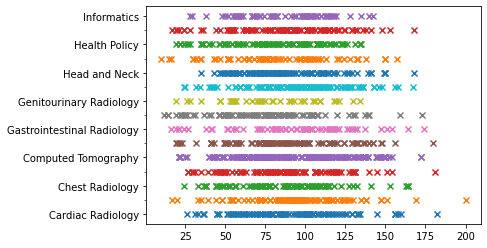

In [ ]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
yticks_count = []
y_tick_topic = []
count =0
for topic in topics:
    ax1.scatter(topic_index[topic]['x'], np.full(len(topic_index[topic]['x']), count), marker="x")
    yticks_count.append(count)
    y_tick_topic.append(topic)
    
    count +=1

ax1.set_yticks(yticks_count, y_tick_topic)
ax1.set_yticklabels(y_tick_topic)
plt.show()


In [ ]:
df['abstract_tokens'] =  df['abstract_preprocess'].apply(lambda x: tokenize(x))
df['title_tokens'] =  df['title_preprocess'].apply(lambda x: tokenize(x))

In [ ]:
with open('tdidf.csv', 'w') as fw:
    fw.write('topic;topic-abstract mean;topic-abstract std;topic-title mean;topic-title std')
    
topics = df['topic'].unique()
count = 0
dictionary = corpora.Dictionary(df['abstract_tokens'])
bag_of_words = [dictionary.doc2bow(doc) for doc in df['abstract_tokens']]
tfidf = models.TfidfModel(bag_of_words)
for topic in topics:
    print(topic)
    topic_data = df.loc[df['topic'] == topic]
    topic = preprocess(topic,lemmatize = True)
    topic_tokens = topic.split()

    feature_cnt = len(dictionary.token2id)
    topic_vec = dictionary.doc2bow(topic_tokens)

    index = similarities.MatrixSimilarity(tfidf[bag_of_words],num_features = feature_cnt)
    sim = index[tfidf[topic_vec]]
    print(np.mean(sim))
    print(np.std(sim))
    
    
    dictionary_title = corpora.Dictionary(topic_data['title_tokens'])
    bag_of_words_title = [dictionary_title.doc2bow(doc) for doc in topic_data['title_tokens']]
    tfidf_title = models.TfidfModel(bag_of_words_title)
    feature_cnt_title = len(dictionary_title.token2id)
    
    index_title = similarities.MatrixSimilarity(tfidf_title[bag_of_words_title],num_features = feature_cnt_title)
    sim_title = index[tfidf_title[topic_vec]]
    print(np.mean(sim_title))
    print(np.std(sim_title))
    
    with open('tdidf.csv', 'a') as fw:
        fw.write('\n'+topic+';'+str(np.mean(sim))+';'+str(np.std(sim))+';'+str(np.mean(sim_title))+';'+str(np.std(sim_title)))


In [ ]:
tfidf = models.TfidfModel(bag_of_words, smartirs='ntc')
for doc in tfidf[bag_of_words]:
    print([[dictionary[id], np.around(freq,decimals=2)] for id, freq in doc])

# 5) FastText Embeddding calcultion

In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.1 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3163281 sha256=df2e83c7328d305d7a4353c831c906883a8417ddb39b3dea5a361a7e221273d6
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
# fastext embedding
data['abstract_vector'] = data['abstract_cleaned'].apply(ft.get_sentence_vector)
data['topic_vector'] = data['topic_cleaned'].apply(ft.get_sentence_vector)
data['title_vector'] = data['title_cleaned'].apply(ft.get_sentence_vector)
data['title_abstract_vector'] = data['title_abstract_cleaned'].apply(ft.get_sentence_vector)

In [ ]:
import fasttext
import fasttext.util

fasttext.util.download_model('en', if_exists='ignore')
ft = fasttext.load_model('cc.en.300.bin')


##  Convert embeddings to 2 Principle components 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [ ]:
pca.explained_variance_

array([0.00591719, 0.00358924], dtype=float32)

In [ ]:
vector_data = pd.DataFrame(data,columns=['topic_vector','abstract_vector','title_vector','title_abstract_vector'])

In [ ]:
vector_data.head(5)

,topic_vector,abstract_vector,title_vector,title_abstract_vector
0,"[0.019606698, -0.014334035, 0.06178364, 0.0663...","[-0.019171301, 0.02041218, -0.0061590383, 0.05...","[-0.033619013, -0.0036775884, 0.030191982, 0.0...","[-0.02233174, 0.015142544, 0.0017927497, 0.051..."
1,"[0.019606698, -0.014334035, 0.06178364, 0.0663...","[-0.016227495, 0.011873919, 0.0060375747, 0.05...","[-0.012032524, 0.00887106, 0.011936671, 0.0665...","[-0.014403594, 0.010568329, 0.0086023975, 0.06..."
2,"[0.019606698, -0.014334035, 0.06178364, 0.0663...","[0.010565303, 0.001557752, 0.012574315, 0.0627...","[0.034408227, -0.020165538, 0.06276475, 0.0496...","[0.018016217, -0.005230775, 0.028258828, 0.058..."
3,"[0.019606698, -0.014334035, 0.06178364, 0.0663...","[0.012650269, 0.009760812, 0.028754994, 0.0679...","[0.0025699947, 0.0023611013, 0.03762207, 0.065...","[0.008679253, 0.006845774, 0.03224808, 0.06714..."
4,"[0.019606698, -0.014334035, 0.06178364, 0.0663...","[-0.001396907, 0.01640802, 0.017667364, 0.0575...","[-0.008444587, -0.005041185, 0.02569477, 0.045...","[-0.003913935, 0.008747591, 0.0205343, 0.05330..."


In [ ]:
topic_vector = np.vstack(vector_data.topic_vector.values)
abstract_vector = np.vstack(vector_data.abstract_vector.values)
title_vector = np.vstack(vector_data.title_vector.values)
title_abstract_vector = np.vstack(vector_data.title_abstract_vector.values)

In [ ]:
print('topic_vector.shape',topic_vector.shape)
print('abstract_vector.shape',abstract_vector.shape)
print('title_vector.shape',title_vector.shape)
print('title_abstract_vector.shape',title_abstract_vector.shape)

topic_vector.shape (1440, 300)
abstract_vector.shape (1440, 300)
title_vector.shape (1440, 300)
title_abstract_vector.shape (1440, 300)


In [ ]:
topic_vector_pca = pca.fit_transform(topic_vector)
abstract_vector_pca = pca.fit_transform(abstract_vector)
title_vector_pca = pca.fit_transform(title_vector)
title_abstract_pca = pca.fit_transform(title_abstract_vector)

In [ ]:
data['abstract_vector_pca_x'] = abstract_vector_pca[:,0]
data['abstract_vector_pca_y'] = abstract_vector_pca[:,1]

data['title_vector_pca_x'] = title_vector_pca[:,0]
data['title_vector_pca_y'] = title_vector_pca[:,1]

data['title_abstract_pca_x'] = title_abstract_pca[:,0]
data['title_abstract_pca_y'] = title_abstract_pca[:,1]



In [ ]:
 data['topic_vector'].shape

(1440,)

 ## FastText Topic - Abstrct embedding plot

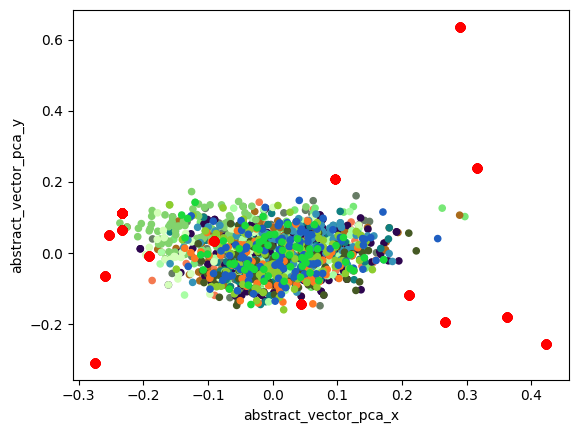

In [ ]:
import matplotlib.pyplot as plt
colors={}
for topic in topics:
    colors[topic] = np.random.rand(3,)


data.plot.scatter(x='abstract_vector_pca_x', y='abstract_vector_pca_y', c=data['topic'].apply(lambda x: colors[x]))
plt.scatter(topic_vector_pca[:,0], topic_vector_pca[:,1], c='red', alpha=0.5)

plt.show()

## FastText Topic - Title embedding plot

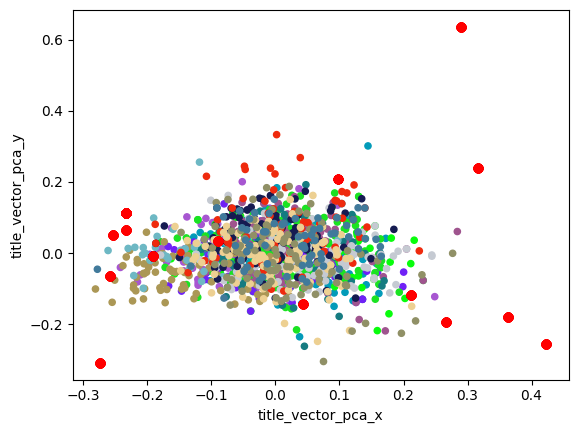

In [ ]:
import matplotlib.pyplot as plt

colors={}
for topic in topics:
    colors[topic] = np.random.rand(3,)

data.plot.scatter(x='title_vector_pca_x', y='title_vector_pca_y', c=data['topic'].apply(lambda x: colors[x]))
plt.scatter(topic_vector_pca[:,0], topic_vector_pca[:,1], c='red', alpha=0.5)

plt.show()


## FastText Topic- Abstract + Title embedding plot

C:\Users\Mawela\anaconda3\envs\dlib\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


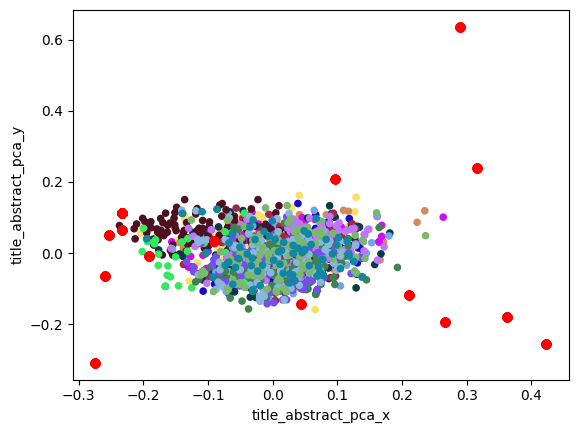

In [ ]:
import matplotlib.pyplot as plt

colors={}
for topic in topics:
    colors[topic] = np.random.rand(3,)


data.plot.scatter(x='title_abstract_pca_x', y='title_abstract_pca_y', c=data['topic'].apply(lambda x: colors[x]))
plt.scatter(topic_vector_pca[:,0], topic_vector_pca[:,1], c='red', alpha=0.5)

plt.show()



# Word2Vec

In [ ]:
data['topic_cleaned_tokens'] = data['topic_cleaned'].apply(tokenize_input)
data['abstract_cleaned_tokens'] = data['abstract_cleaned'].apply(tokenize_input)

In [ ]:
data['topic_token_vector'] = data['topic_cleaned_tokens'].apply(calculate_average_norm_vector)
data['abstract_token_vector'] = data['abstract_cleaned_tokens'].apply(calculate_average_norm_vector)

In [ ]:
vector_data_wv = pd.DataFrame(data,columns=['topic_token_vector','abstract_token_vector'])

In [ ]:
vector_data_wv.head(5)

,topic_token_vector,abstract_token_vector
0,"[-0.059295654, 0.3701172, 0.18164062, 0.080078...","[-0.0262109375, 0.067783203125, 0.057729492187..."
1,"[-0.059295654, 0.3701172, 0.18164062, 0.080078...","[0.0032301683, 0.1345121, 0.02301495, 0.079566..."
2,"[-0.059295654, 0.3701172, 0.18164062, 0.080078...","[-0.07299943, 0.07993941, -0.008629539, 0.1430..."
3,"[-0.059295654, 0.3701172, 0.18164062, 0.080078...","[-0.061657716, 0.13048562, 0.021842957, 0.0477..."
4,"[-0.059295654, 0.3701172, 0.18164062, 0.080078...","[-0.0489290025499132, 0.10469743940565321, 0.0..."


In [ ]:
topic_vector_wv = np.vstack(vector_data_wv.topic_token_vector.values)
abstract_vector_wv = np.vstack(vector_data_wv.abstract_token_vector.values)

In [ ]:
print('topic_vector_wv.shape',topic_vector_wv.shape)
print('abstract_vector_wv.shape',abstract_vector_wv.shape)

topic_vector_wv.shape (1440, 300)
abstract_vector_wv.shape (1440, 300)


In [ ]:
topic_vector_wv_pca = pca.fit_transform(topic_vector_wv)
abstract_vector_wv_pca = pca.fit_transform(abstract_vector_wv)

In [ ]:
data['abstract_vector_wv_pca_x'] = abstract_vector_wv_pca[:,0]
data['abstract_vector_wv_pca_y'] = abstract_vector_wv_pca[:,1]

## Word2Vec Topic-Title embedding plot

C:\Users\Mawela\anaconda3\envs\dlib\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


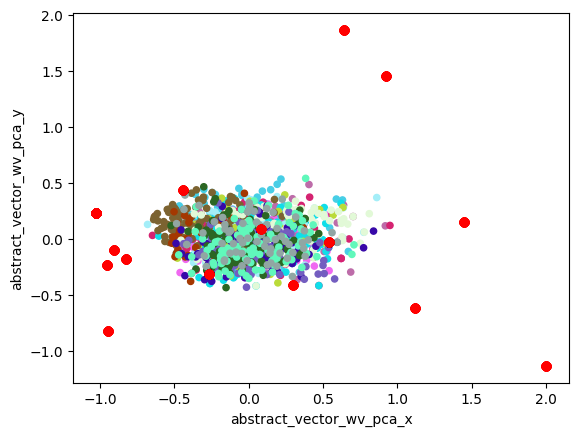

In [ ]:
import matplotlib.pyplot as plt

colors={}
for topic in topics:
    colors[topic] = np.random.rand(3,)

# df.plot.scatter(x='x', y='y', c=df['type'].apply(lambda x: colors[x]))
data.plot.scatter(x='abstract_vector_wv_pca_x', y='abstract_vector_wv_pca_y', c=data['topic'].apply(lambda x: colors[x]))
plt.scatter(topic_vector_wv_pca[:,0], topic_vector_wv_pca[:,1], c='red', alpha=0.5)
# plt.scatter(data['abstract_vector_pca_x'], data['abstract_vector_pca_y'], c='blue', alpha=0.5)
plt.show()

# BERT Embedding

In [ ]:
!pip install bert-embedding
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mxnet-cu92

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 789.8 MB 16 kB/s 
     |████████████████████████████████| 15.7 MB 48.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.4.0 requires numpy<1.15.0,>=1.8.2, but you have numpy 1.21.6 which is incompatible.
bert-embedding 1.0.1 requires numpy==1.14.6, but you have numpy 1.21.6 which is incompatible.


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 15.1 MB/s 
     |████████████████████████████████| 163 kB 43.8 MB/s 
     |████████████████████████████████| 7.6 MB 50.3 MB/s 
     |████████████████████████████████| 15.7 MB 47.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.4.0 requires numpy<1.15.0,>=1.8.2, but you have numpy 1.21.6 which is incompatible.
bert-embedding 1.0.1 requires numpy==1.14.6, but you have numpy 1.21.6 which is incompatible.


In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.9 MB/s 
     |████████████████████████████████| 1.3 MB 33.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=0deddd88b6ff71746f16841715a2a23a4a47f5f697d1638927a1e67be24dfc85
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-uncased')

Downloading:   0%|          | 0.00/437 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
data['abstract_vector_bert'] = data['abstract_cleaned'].apply(model.encode)
data['topic_vector_bert'] = data['topic_cleaned'].apply(model.encode)

In [ ]:
data.head(5)

,topic,title,authors,abstract,title_abstract,topic_cleaned,abstract_cleaned,title_cleaned,abstract_vector_bert,topic_vector_bert
0,Breast Imaging,A Pilot Study to Assess the Performance of Pha...,Laurie L. Fajardo Stephen L. Hillis Bin Zheng ...,In this pilot study for an inline phase-sensit...,A Pilot Study to Assess the Performance of Pha...,breast imaging,pilot study inline phasesensitive breast tomos...,pilot study assess performance phasesensitive ...,"[-0.055684954, 0.033963453, 0.29677433, 0.0364...","[0.05703056, -0.15678297, -0.728428, -0.485479..."
1,Breast Imaging,The Digital Divide in Radiology: Computer Use ...,Peter Abraham Patricia Balthazar Nicholas Jame...,Reliance on digital patient portals and online...,The Digital Divide in Radiology: Computer Use ...,breast imaging,reliance digital patient portals online schedu...,digital divide radiology use health carerelate...,"[-0.007461858, 0.11477945, 0.19709381, 0.01177...","[0.05703056, -0.15678297, -0.728428, -0.485479..."
2,Breast Imaging,Association of Longitudinal Mammographic Breas...,Thi Xuan Mai Tran Soyeoun Kim Huiyeon Song Eun...,In premenopausal and postmenopausal women unde...,Association of Longitudinal Mammographic Breas...,breast imaging,premenopausal postmenopausal women undergoing ...,association longitudinal mammographic breast d...,"[-0.22907412, 0.11268088, 0.12304842, -0.19150...","[0.05703056, -0.15678297, -0.728428, -0.485479..."
3,Breast Imaging,Background Parenchymal Enhancement at Postoper...,Su Hyun Lee Myoung-jin Jang Heera Yoen Youkyou...,Background parenchymal enhancement assessed at...,Background Parenchymal Enhancement at Postoper...,breast imaging,background parenchymal enhancement assessed po...,background parenchymal enhancement postoperati...,"[0.093761645, -0.04435665, -0.02177887, -0.240...","[0.05703056, -0.15678297, -0.728428, -0.485479..."
4,Breast Imaging,Prospective Evaluation of Ultrafast Breast MRI...,Toulsie Ramtohul Clara Tescher Pauline Vaflard...,The wash-in slope derived from initial ultrafa...,Prospective Evaluation of Ultrafast Breast MRI...,breast imaging,washin slope derived initial ultrafast breast ...,prospective evaluation ultrafast breast mri pr...,"[-0.35419437, -0.09244561, 0.028805058, -0.217...","[0.05703056, -0.15678297, -0.728428, -0.485479..."


In [ ]:
topic_vector_bert = np.vstack(data.topic_vector_bert.values)
abstract_vector_bert = np.vstack(data.abstract_vector_bert.values)

In [ ]:
topic_vector_bert.shape

(1440, 768)

In [ ]:
topic_vector_pca_bert = pca.fit_transform(topic_vector_bert)
abstract_vector_pca_bert = pca.fit_transform(abstract_vector_bert)

In [ ]:
print("topic_vector_pca_bert",topic_vector_pca_bert.shape)
print("abstract_vector_pca_bert",abstract_vector_pca_bert.shape)

topic_vector_pca_bert (1440, 2)
abstract_vector_pca_bert (1440, 2)


In [ ]:
data['abstract_vector_pca_bert_x'] = abstract_vector_pca_bert[:,0]
data['abstract_vector_pca_bert_y'] = abstract_vector_pca_bert[:,1]

## BERT Embedding Topic-Abstract plot

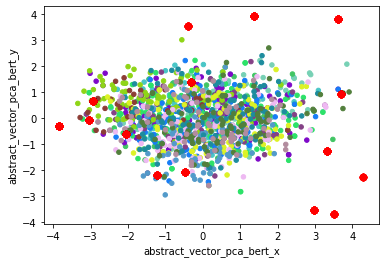

In [ ]:
import matplotlib.pyplot as plt
colors={}
for topic in topics:
    colors[topic] = np.random.rand(3,)

# df.plot.scatter(x='x', y='y', c=df['type'].apply(lambda x: colors[x]))
data.plot.scatter(x='abstract_vector_pca_bert_x', y='abstract_vector_pca_bert_y', c=data['topic'].apply(lambda x: colors[x]))
plt.scatter(topic_vector_pca_bert[:,0], topic_vector_pca_bert[:,1],s=10*4, c='red', alpha=0.5)
# plt.scatter(data['abstract_vector_pca_x'], data['abstract_vector_pca_y'], c='blue', alpha=0.5)
plt.show()